In [2]:
import pandas as pd 
import numpy as np


In [3]:
df = pd.read_excel("placement.xlsx")

### Steps in Training any machine learning model

1. Preprocess + EDA + Feature Selection
2. Extract Input and Output cols
3. Scale the values
4. Train test split  ( this can be done in interchange with the scale the values)
5. Train the model 
6. Evaluate the model/  Model seclection
7. Deploy the model


In [4]:
df.head()

,cgpa,iq,placed
0,8.5,120,1
1,7.2,98,0
2,9.1,130,1
3,6.8,90,0
4,8.9,125,1


In [5]:
### Preprocessing the data and Eda and the feature selection or engineering  (here the data is very simple and already clean so we can skip this part)
df.shape

(90, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    90 non-null     float64
 1   iq      90 non-null     int64  
 2   placed  90 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.2 KB


In [7]:
import matplotlib.pyplot as plt


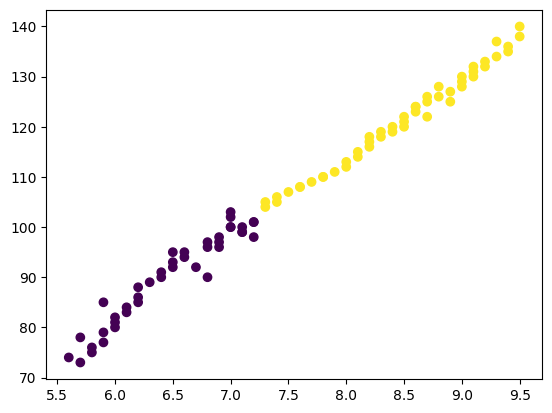

In [8]:
# plt.scatter(df["cgpa"], df["iq"] , color = ["blue" if placed else "red" for placed in df["placed"]])
plt.scatter(df["cgpa"], df["iq"] , c = df["placed"])

In [9]:
### Extract the input and the output features 

x = df[["cgpa","iq"]]
y = df["placed"]

In [10]:
x.head()

,cgpa,iq
0,8.5,120
1,7.2,98
2,9.1,130
3,6.8,90
4,8.9,125


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: placed, dtype: int64

In [12]:
### Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [13]:
x_train

,cgpa,iq
49,6.5,93
62,5.8,76
73,8.8,128
69,6.4,90
76,6.0,81
...,...,...
20,7.6,108
60,7.0,103
71,7.6,108
14,6.0,80


In [14]:
y_train

49    0
62    0
73    1
69    0
76    0
     ..
20    1
60    0
71    1
14    0
51    1
Name: placed, Length: 72, dtype: int64

In [15]:
x_test

,cgpa,iq
40,7.7,109
22,8.6,124
55,9.4,136
70,8.4,119
0,8.5,120
26,7.9,111
39,8.5,121
65,6.1,84
10,9.4,135
44,9.1,131


In [16]:
y_test

40    1
22    1
55    1
70    1
0     1
26    1
39    1
65    0
10    1
44    1
81    1
35    1
56    0
86    1
12    1
4     1
18    0
28    1
Name: placed, dtype: int64

In [17]:
### Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)

In [19]:
x_test = scaler.transform(x_test)   

In [20]:
### Model Training using Logistic Regression ( Here the problem is a classification problem )

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [22]:
y_test

40    1
22    1
55    1
70    1
0     1
26    1
39    1
65    0
10    1
44    1
81    1
35    1
56    0
86    1
12    1
4     1
18    0
28    1
Name: placed, dtype: int64

In [23]:
### Evaluation of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

100.0

In [ ]:
# saving the model using pickle 

import pickle

pickle.dunp(model,open("placement_model.pkl","wb"))